In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random
#import cv2
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist
np.random.seed(42)

## K-Means Algorithm 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/UFMG/8º SEMESTRE/SISTEMAS NEBULOSOS/tp-1

/content/drive/MyDrive/UFMG/8º SEMESTRE/SISTEMAS NEBULOSOS/tp-1


Numero de obervacoes:  800
Numero de atributos (features):  2


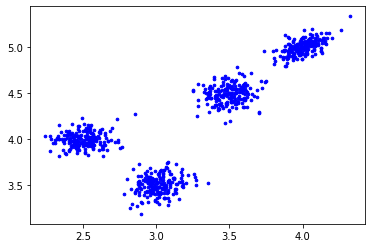

In [4]:
# loading data set
# data (NxM) = DataFrame a ser clusterizado N observacoes e M features
data = loadmat('fcm_dataset.mat')
data = pd.DataFrame(data['x'])
lendata = len(data)
print('Numero de obervacoes: ', lendata)
nfeatures = data.shape[1]
print('Numero de atributos (features): ', nfeatures)

data_np = data.values
for i in range(len(data_np)):
        plt.scatter(data_np[i][0], data_np[i][1], s=7, color = 'blue')

In [5]:
# Inicializacao
# partitions: np.array(N x K) - matriz de partições (pertinencia da observacao ao K-esimo grupo)

K = 4  # numero de grupos (clusters)

partitions = np.zeros([lendata, K])
idx = np.zeros(lendata)

# inicializacao aleatoria da matriz de partições
for i in range(lendata):
    rnd = np.random.random(K)
    partitions[i] = rnd/sum(rnd)
    idx[i] = np.argmax(partitions[i], axis=0)


In [6]:
print(partitions)

[[0.14102156 0.35796222 0.27560979 0.22540643]
 [0.12620081 0.1261813  0.04698284 0.70063506]
 [0.2613905  0.30790022 0.00895102 0.42175826]
 ...
 [0.29180322 0.27797554 0.10840047 0.32182078]
 [0.44532043 0.15271079 0.16564881 0.23631997]
 [0.40692911 0.37890979 0.04434913 0.16981196]]


In [7]:
print(idx)

[1. 3. 3. 0. 1. 0. 1. 2. 2. 2. 3. 1. 2. 0. 3. 2. 3. 1. 1. 0. 0. 2. 0. 2.
 0. 1. 0. 2. 0. 2. 1. 3. 1. 2. 3. 0. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 3.
 0. 1. 3. 3. 3. 2. 3. 0. 2. 0. 3. 2. 1. 3. 0. 0. 0. 1. 0. 3. 1. 0. 0. 0.
 1. 0. 0. 3. 1. 0. 1. 0. 1. 0. 3. 1. 0. 0. 2. 3. 0. 2. 1. 2. 0. 1. 0. 3.
 1. 2. 3. 0. 1. 1. 3. 0. 3. 0. 3. 3. 3. 1. 1. 2. 2. 1. 1. 2. 0. 3. 3. 2.
 1. 1. 0. 2. 3. 3. 2. 0. 0. 2. 2. 0. 3. 0. 0. 0. 3. 3. 2. 2. 0. 1. 0. 3.
 1. 1. 0. 3. 2. 0. 1. 1. 3. 3. 2. 3. 3. 3. 1. 0. 3. 1. 0. 1. 2. 1. 2. 3.
 3. 2. 0. 0. 0. 3. 1. 0. 1. 2. 3. 1. 0. 1. 3. 3. 1. 2. 1. 3. 3. 2. 3. 3.
 3. 2. 1. 0. 1. 1. 3. 0. 0. 2. 2. 1. 0. 0. 1. 0. 2. 0. 3. 3. 3. 1. 2. 0.
 1. 1. 0. 0. 1. 0. 3. 0. 1. 3. 1. 2. 0. 1. 2. 3. 3. 0. 1. 3. 3. 0. 1. 3.
 1. 2. 3. 0. 3. 1. 0. 1. 1. 2. 2. 3. 3. 0. 2. 3. 0. 1. 3. 1. 1. 0. 2. 2.
 0. 1. 1. 0. 2. 3. 3. 0. 0. 0. 2. 1. 0. 2. 2. 1. 1. 0. 2. 2. 0. 0. 1. 1.
 3. 1. 0. 2. 3. 2. 0. 0. 1. 1. 3. 0. 0. 1. 1. 1. 1. 0. 1. 0. 2. 2. 0. 0.
 0. 2. 3. 1. 3. 3. 0. 1. 1. 1. 2. 2. 3. 1. 1. 3. 1.

In [8]:
# funcao que obtem os centroides
# centroids: np.array(K x N) - centroides (K vetores de M features) de cada grupo
def calc_centroids(data, partitions):
    nfeatures = data.shape[1]
    K = partitions.shape[1]
    centroids = np.zeros([K,nfeatures])
    data_np = data.values
    for i in range(K):
        centroids[i] = partitions[:, i].dot(data_np)/np.sum(partitions[:, i])
    return centroids

In [9]:
cent = np.zeros([K,nfeatures])
cent = calc_centroids(data, partitions)
print(cent)

[[3.24462518 4.24267735]
 [3.25423823 4.25198881]
 [3.25578937 4.2464917 ]
 [3.25907448 4.24469388]]


In [110]:
list_dist = cdist(data_np, cent)
sum_dist = list_dist.sum(axis=1)

In [67]:
def __update_partitions(partitions, data_n, cent, m=2):
    partitions_new = np.zeros(partitions.shape)
    for i in range(data_np.shape[0]):
        list_dist = [np.linalg.norm(data_np[i]-c) for c in cent]
        sum_dist = sum(list_dist)
        for k in range(cent.shape[0]):
            partitions_new[i][k] = 1 / (np.linalg.norm(data_np[i]-cent[k])/sum_dist) ** 2

        partitions_new[i, :] = partitions_new[i, :] / np.sum(partitions_new[i, :])

    return partitions_new


In [ ]:
a = np.array([1, 0])
b = np.array([0, 1])
# np.linalg.norm(a-b)
cdist([a], [b])

array([[1.41421356]])

In [10]:
def update_partitions(partitions, data_np, cent, m=2):
    print((2/(m-1)))
    partitions_new = np.zeros(partitions.shape)
    list_dist = cdist(data_np, cent)
    sum_dist = list_dist.sum(axis=1)

    for i in range(data_np.shape[0]):
        for k in range(cent.shape[0]):
            partitions_new[i][k] = 1 / ((list_dist[i][k]/sum_dist[i]) ** (2/(m-1)))

        partitions_new[i, :] = partitions_new[i, :] / np.sum(partitions_new[i, :])
    
    return partitions_new, list_dist

In [12]:
def calc_cost_function(partitions, list_dist, m=2):
    return np.multiply(partitions**m, list_dist**2).sum()

2.0
13.405018559677984


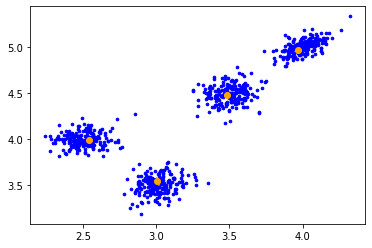

In [39]:
%matplotlib inline

cent = calc_centroids(data, partitions)
partitions, list_dist = update_partitions(partitions, data, cent)
print(calc_cost_function(partitions, list_dist))
plt.scatter(data_np[:,0], data_np[:,1], s=7, color = 'blue')
plt.scatter(cent[:, 0], cent[:, 1], color = 'orange')

In [102]:
calc_cost_function(partitions, list_dist, 2)

14.297396135679836

In [93]:
partitions.shape

(800, 4)

In [94]:
list_dist.shape

(800, 4)

In [95]:
np.multiply(partitions, list_dist).shape

(800, 4)

In [96]:
partitions

array([[0.04994836, 0.01070988, 0.92848791, 0.01085386],
       [0.06754844, 0.00876719, 0.91452981, 0.00915456],
       [0.0114208 , 0.00199743, 0.98465682, 0.00192495],
       ...,
       [0.00711261, 0.01916515, 0.00283251, 0.97088973],
       [0.00937239, 0.02519268, 0.00377506, 0.96165987],
       [0.02182799, 0.04917232, 0.00905482, 0.91994487]])

In [97]:
partitions**2

array([[2.49483854e-03, 1.14701443e-04, 8.62089798e-01, 1.17806188e-04],
       [4.56279222e-03, 7.68635355e-05, 8.36364782e-01, 8.38059109e-05],
       [1.30434641e-04, 3.98971920e-06, 9.69549062e-01, 3.70542765e-06],
       ...,
       [5.05892263e-05, 3.67302885e-04, 8.02313693e-06, 9.42626863e-01],
       [8.78417427e-05, 6.34671194e-04, 1.42510417e-05, 9.24789707e-01],
       [4.76461141e-04, 2.41791704e-03, 8.19898112e-05, 8.46298560e-01]])

In [99]:
0.97088973**2

0.9426268678194729